In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bank_transactions.csv to bank_transactions (1).csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bank_transactions.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [7]:
#convert the CustomerDOB and TransactionDate to datetime
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1048567 non-null  object        
 1   CustomerID               1048567 non-null  object        
 2   CustomerDOB              1045170 non-null  datetime64[ns]
 3   CustGender               1047467 non-null  object        
 4   CustLocation             1048416 non-null  object        
 5   CustAccountBalance       1046198 non-null  float64       
 6   TransactionDate          1048567 non-null  datetime64[ns]
 7   TransactionTime          1048567 non-null  int64         
 8   TransactionAmount (INR)  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 72.0+ MB


RFM ANALYSIS
Recency

In [8]:
df['rank']  = df.sort_values(['CustomerID', 'TransactionDate']).groupby(['CustomerID'])['TransactionDate'].rank(method='min').astype(int)
df_rec = df[df['rank'] == 1]
df_rec['recency'] = (df_rec['TransactionDate'] - pd.to_datetime(min(df_rec['TransactionDate']))).dt.days
df_rec.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),rank,recency
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,1,31
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,1,31
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,1,31
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,1,31
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,1,31


Frequency 

In [10]:
freq = df.groupby(['CustomerID'])['TransactionDate'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['CustomerID', 'frequency']
rec_freq = df_freq.merge(df_rec, on='CustomerID')
rec_freq.head()

,CustomerID,frequency,TransactionID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),rank,recency
0,C1010011,2,T173509,1983-05-08,M,NEW DELHI,120180.54,2016-09-08,11229,356.0,1,244
1,C1010012,1,T363022,1994-07-28,M,MUMBAI,24204.49,2016-08-14,204409,1499.0,1,219
2,C1010014,2,T89544,1992-04-06,F,MUMBAI,38377.14,2016-01-08,154451,1205.0,1,0
3,C1010018,1,T971994,1990-05-29,F,CHAMPARAN,496.18,2016-09-15,170254,30.0,1,251
4,C1010024,1,T401396,2065-06-21,M,KOLKATA,87058.65,2016-08-18,141103,5000.0,1,223


Monetary

In [11]:
#monetary value
df_mon = df.groupby(['CustomerID'])['TransactionAmount (INR)'].sum()
df_mon = pd.DataFrame(df_mon).reset_index()
df_mon.columns = ['CustomerID', 'monetary']
rec_freq_mon = rec_freq.merge(df_mon, on='CustomerID')
rec_freq_mon.head()

,CustomerID,frequency,TransactionID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),rank,recency,monetary
0,C1010011,2,T173509,1983-05-08,M,NEW DELHI,120180.54,2016-09-08,11229,356.0,1,244,5106.0
1,C1010012,1,T363022,1994-07-28,M,MUMBAI,24204.49,2016-08-14,204409,1499.0,1,219,1499.0
2,C1010014,2,T89544,1992-04-06,F,MUMBAI,38377.14,2016-01-08,154451,1205.0,1,0,1455.0
3,C1010018,1,T971994,1990-05-29,F,CHAMPARAN,496.18,2016-09-15,170254,30.0,1,251,30.0
4,C1010024,1,T401396,2065-06-21,M,KOLKATA,87058.65,2016-08-18,141103,5000.0,1,223,5000.0


Removing Outliers


In [12]:
rfm = rec_freq_mon[['recency', 'frequency', 'monetary']]

recency:


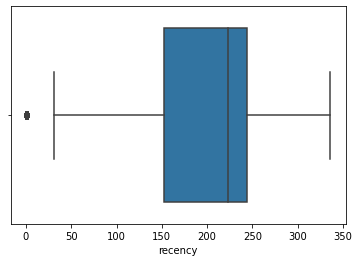

frequency:


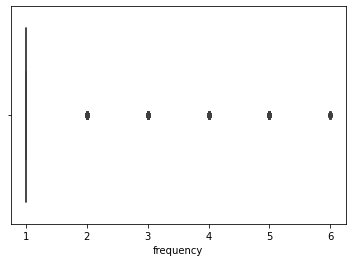

monetary:


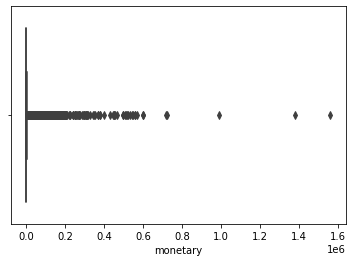

In [13]:
rfm_cols = ['recency', 'frequency', 'monetary']
for col in rfm_cols:
    print(str(col)+':')
    ax = sns.boxplot(x=rfm[str(col)])
    plt.show()

In [14]:
#calculating z score and removing outliers
from scipy import stats
# remove the customer id column
new_df = rfm[['recency','frequency','monetary']]
# remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]
new_df.head()

,recency,frequency,monetary
0,244,2,5106.0
1,219,1,1499.0
2,0,2,1455.0
3,251,1,30.0
4,223,1,5000.0


Standardisation

In [15]:
#check for duplicates
new_df.duplicated().sum()


553534

In [16]:
#standardize the data
new_df = new_df.drop_duplicates()
scalar = StandardScaler()
scalar.fit(new_df.values)
scaled_data = scalar.transform(new_df.values)
scaled_data = pd.DataFrame(scaled_data, columns=new_df.columns)
scaled_data.head()

,recency,frequency,monetary
0,0.652204,1.520971,0.811281
1,0.355182,-0.657475,-0.289201
2,-2.246739,1.520971,-0.302625
3,0.735371,-0.657475,-0.737387
4,0.402705,-0.657475,0.778941


Segmentations with KMeans

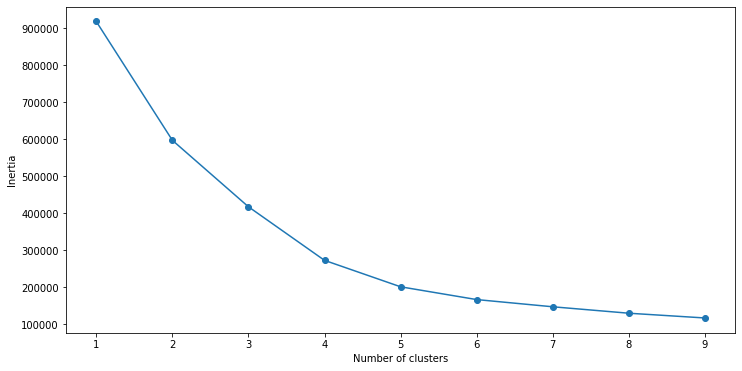

In [17]:
#segmentation with kmeans
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(scaled_data)
    sse.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1, 10), 'SSE':sse})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [18]:
#we find the point of inflection is at 4 cluster mark
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(scaled_data)
labels = kmeans.labels_
labels

array([2, 0, 2, ..., 1, 0, 0], dtype=int32)

In [19]:
print(silhouette_score(scaled_data, labels, metric='euclidean'))

0.5272106122048643
